In [30]:
from typing import TypedDict, Annotated
from pydantic import BaseModel 
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.graph import add_messages # prebuilt reducer function to append
from langgraph.checkpoint.memory import  InMemorySaver #implement persistence in ram

load_dotenv()
llm=ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

In [31]:
class ChatState(TypedDict):
    topic:str
    joke:str
    explaination:str

In [32]:
def generate_joke(state:ChatState):
    prompt=f"generate a joke on the topic {state["topic"]}"
    response=llm.invoke(prompt).content

    return {'joke':response}
  
def generate_explaination(state:ChatState):
    prompt=f"write an explaination for the joke:\n {state["joke"]}"
    response=llm.invoke(prompt).content

    return {'explaination':response}
  

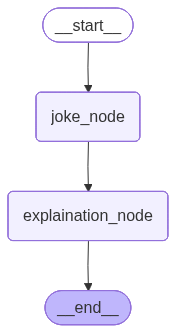

In [33]:
graph=StateGraph(ChatState)

#add nodes
graph.add_node('joke_node',generate_joke)
graph.add_node('explaination_node',generate_explaination)
#add edges
graph.add_edge(START,'joke_node')
graph.add_edge('joke_node','explaination_node')
graph.add_edge("explaination_node",END)

graph.compile()

In [34]:
checkpointer=InMemorySaver()
workflow=graph.compile(checkpointer=checkpointer)

thread_id='1' # a thread is one interaction with the chatbot, like a session id
config = {
    "configurable": {
        "thread_id": 1
    }
}


In [35]:
workflow.invoke(
    {
        'topic':'pizza'
    },
    config=config
)

{'topic': 'pizza',
 'joke': 'Why did the pizza break up with the cheese? \n\nBecause it was *too cheesy*!',
 'explaination': 'The joke relies on a pun, which is a play on words. Here\'s a breakdown:\n\n*   **The Setup:** The joke presents a relationship scenario, asking why the pizza and cheese broke up. This sets the stage for a humorous answer.\n*   **The Pun:** The punchline is "Because it was *too cheesy*!"\n    *   "Cheesy" has two meanings:\n        *   **Literal:** Referring to the cheese on the pizza, which is a key ingredient.\n        *   **Figurative:** Meaning overly sentimental, corny, or inauthentic (like "cheesy" movies or jokes).\n*   **The Humor:** The joke exploits the double meaning of "cheesy." The pizza "broke up" with the cheese because the cheese, in the context of the joke, became "too cheesy" in the sense of being overly sentimental, corny, or insincere, which is a common reason for relationships to end. The humor comes from the unexpected application of a comm

In [36]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza break up with the cheese? \n\nBecause it was *too cheesy*!', 'explaination': 'The joke relies on a pun, which is a play on words. Here\'s a breakdown:\n\n*   **The Setup:** The joke presents a relationship scenario, asking why the pizza and cheese broke up. This sets the stage for a humorous answer.\n*   **The Pun:** The punchline is "Because it was *too cheesy*!"\n    *   "Cheesy" has two meanings:\n        *   **Literal:** Referring to the cheese on the pizza, which is a key ingredient.\n        *   **Figurative:** Meaning overly sentimental, corny, or inauthentic (like "cheesy" movies or jokes).\n*   **The Humor:** The joke exploits the double meaning of "cheesy." The pizza "broke up" with the cheese because the cheese, in the context of the joke, became "too cheesy" in the sense of being overly sentimental, corny, or insincere, which is a common reason for relationships to end. The humor comes from the unexpected ap

In [37]:
list(workflow.get_state_history(config))

#before end
#before explaination
#before gegenerate joke
#before start

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza break up with the cheese? \n\nBecause it was *too cheesy*!', 'explaination': 'The joke relies on a pun, which is a play on words. Here\'s a breakdown:\n\n*   **The Setup:** The joke presents a relationship scenario, asking why the pizza and cheese broke up. This sets the stage for a humorous answer.\n*   **The Pun:** The punchline is "Because it was *too cheesy*!"\n    *   "Cheesy" has two meanings:\n        *   **Literal:** Referring to the cheese on the pizza, which is a key ingredient.\n        *   **Figurative:** Meaning overly sentimental, corny, or inauthentic (like "cheesy" movies or jokes).\n*   **The Humor:** The joke exploits the double meaning of "cheesy." The pizza "broke up" with the cheese because the cheese, in the context of the joke, became "too cheesy" in the sense of being overly sentimental, corny, or insincere, which is a common reason for relationships to end. The humor comes from the unexpected a

In [38]:
config2 = {
    "configurable": {
        "thread_id": 2
    }
}

workflow.invoke(
    {
        'topic':'pasta'
    },
    config=config2
)

{'topic': 'pasta',
 'joke': "Why did the pasta break up with the olive oil? \n\nBecause they just couldn't see eye to eye... and he was too saucy!",
 'explaination': 'Here\'s an explanation of the joke:\n\n*   **"Why did the pasta break up with the olive oil?"** This sets up the premise of the joke, implying a relationship between pasta and olive oil.\n*   **"Because they just couldn\'t see eye to eye..."** This plays on the idiom "see eye to eye," which means to agree or have the same viewpoint. It\'s a pun, as pasta and olive oil are ingredients, they literally can\'t see with eyes.\n*   **"...and he was too saucy!"** This is another pun. "Saucy" can mean both "having a sauce on it" (referring to the olive oil and pasta) and "impudent" or "rude" (referring to the olive oil\'s personality). The joke is that the olive oil\'s behavior was a problem in their relationship.\n\n**In summary:** The joke uses wordplay (puns) to create humor. It personifies pasta and olive oil as having a rela

In [41]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza break up with the cheese? \n\nBecause it was *too cheesy*!', 'explaination': 'The joke relies on a pun, which is a play on words. Here\'s a breakdown:\n\n*   **The Setup:** The joke presents a relationship scenario, asking why the pizza and cheese broke up. This sets the stage for a humorous answer.\n*   **The Pun:** The punchline is "Because it was *too cheesy*!"\n    *   "Cheesy" has two meanings:\n        *   **Literal:** Referring to the cheese on the pizza, which is a key ingredient.\n        *   **Figurative:** Meaning overly sentimental, corny, or inauthentic (like "cheesy" movies or jokes).\n*   **The Humor:** The joke exploits the double meaning of "cheesy." The pizza "broke up" with the cheese because the cheese, in the context of the joke, became "too cheesy" in the sense of being overly sentimental, corny, or insincere, which is a common reason for relationships to end. The humor comes from the unexpected a

In [46]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta break up with the olive oil? \n\nBecause they just couldn't see eye to eye... and he was too saucy!", 'explaination': 'Here\'s an explanation of the joke:\n\n*   **"Why did the pasta break up with the olive oil?"** This sets up the premise of the joke, implying a relationship between pasta and olive oil.\n*   **"Because they just couldn\'t see eye to eye..."** This plays on the idiom "see eye to eye," which means to agree or have the same viewpoint. It\'s a pun, as pasta and olive oil are ingredients, they literally can\'t see with eyes.\n*   **"...and he was too saucy!"** This is another pun. "Saucy" can mean both "having a sauce on it" (referring to the olive oil and pasta) and "impudent" or "rude" (referring to the olive oil\'s personality). The joke is that the olive oil\'s behavior was a problem in their relationship.\n\n**In summary:** The joke uses wordplay (puns) to create humor. It personifies pasta and olive 

Time travel

In [ ]:
#get state
workflow.get_state({
    "configurable":{
        "thread_id":2,
        "checkpoint_id":"1f08b359-1e9f-6227-8001-446798f2e16e"
    }
})


StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta break up with the olive oil? \n\nBecause they just couldn't see eye to eye... and he was too saucy!"}, next=('explaination_node',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f08b359-1e9f-6227-8001-446798f2e16e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-09-06T15:24:24.604097+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f08b359-174c-6f81-8000-914dab63e948'}}, tasks=(PregelTask(id='e9018099-3bb0-6b12-1c03-4a2da7e0b852', name='explaination_node', path=('__pregel_pull', 'explaination_node'), error=None, interrupts=(), state=None, result={'explaination': 'Here\'s an explanation of the joke:\n\n*   **"Why did the pasta break up with the olive oil?"** This sets up the premise of the joke, implying a relationship between pasta and olive oil.\n*   **"Because they just couldn\'t see eye to eye..."** This plays on the idiom "se

In [48]:
#restart from a checkpoint
workflow.invoke(None,
                {
    "configurable":{
        "thread_id":2,
        "checkpoint_id":"1f08b359-1e9f-6227-8001-446798f2e16e"
    }}

                )

list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': "Why did the pasta break up with the olive oil? \n\nBecause they just couldn't see eye to eye... and he was too saucy!", 'explaination': 'Here\'s the breakdown of the joke:\n\n*   **Setup:** The joke sets up a relatable situation: a breakup. This immediately grabs the listener\'s attention.\n*   **Punchline 1: "couldn\'t see eye to eye..."** This is a common idiom meaning that two people have differing opinions or can\'t agree on things, which is a frequent cause for breakups. The joke cleverly uses this idiom in a literal sense, referencing the fact that olive oil doesn\'t have eyes.\n*   **Punchline 2: "...and he was too saucy!"** "Saucy" is a pun. It plays on two meanings:\n    *   **Literal:** Olive oil is used in sauces, so he is literally "saucy."\n    *   **Figurative:** "Saucy" can mean someone is rude, cheeky, or overly familiar. This implies the olive oil had a bad attitude or was too forward, which could also lead to relations

In [53]:
#update state
workflow.update_state({
    "configurable":{
        "thread_id":2,
        "checkpoint_id":"1f08b359-37b2-6d0c-8002-4e1cc38e7808",
        'checkpoint_ns':""
    }
},
#updated value of state 
{'topic':'samosa'}
)

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f08b376-bb57-6c24-8003-44fb7eda7707'}}

In [54]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa', 'joke': "Why did the pasta break up with the olive oil? \n\nBecause they just couldn't see eye to eye... and he was too saucy!", 'explaination': 'Here\'s an explanation of the joke:\n\n*   **"Why did the pasta break up with the olive oil?"** This sets up the premise of the joke, implying a relationship between pasta and olive oil.\n*   **"Because they just couldn\'t see eye to eye..."** This plays on the idiom "see eye to eye," which means to agree or have the same viewpoint. It\'s a pun, as pasta and olive oil are ingredients, they literally can\'t see with eyes.\n*   **"...and he was too saucy!"** This is another pun. "Saucy" can mean both "having a sauce on it" (referring to the olive oil and pasta) and "impudent" or "rude" (referring to the olive oil\'s personality). The joke is that the olive oil\'s behavior was a problem in their relationship.\n\n**In summary:** The joke uses wordplay (puns) to create humor. It personifies pasta and olive